In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

### Asset Return Correlations

In [2]:
commodities = pd.read_csv('GSCI Commodity Index.csv', parse_dates=['date'], index_col=['date'])
commodities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12618 entries, 1969-12-31 to 2018-05-15
Data columns (total 1 columns):
gsci    12618 non-null float64
dtypes: float64(1)
memory usage: 197.2 KB


In [3]:
corporate = {'BAMLCC0A1AAATRIV': 'ICE BofAML US Corp AAA Total Return Index Value',
             'BAMLCC0A0CMTRIV': 'ICE BofAML US Corp Master Total Return Index Value',
             'BAMLHYH0A0HYM2TRIV': 'ICE BofAML US High Yield Total Return Index Value'
            }

In [4]:
corp = web.DataReader(name=list(corporate.keys()), data_source='fred', start=1950).rename(columns=corporate).dropna(how='all')
corp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8371 entries, 1972-12-31 to 2018-06-18
Data columns (total 3 columns):
ICE BofAML US Corp AAA Total Return Index Value       7657 non-null float64
ICE BofAML US Corp Master Total Return Index Value    8371 non-null float64
ICE BofAML US High Yield Total Return Index Value     7307 non-null float64
dtypes: float64(3)
memory usage: 261.6 KB


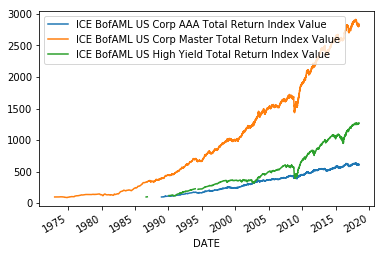

In [5]:
corp.plot();

In [72]:
data = pd.concat([commodities, corp], axis=1).pct_change()

In [77]:
corr = data.rolling(window='250D').corr().unstack()

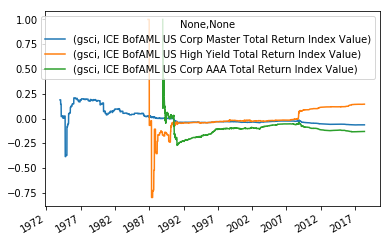

In [80]:
corr.iloc[:, 1:4].plot()

In [65]:
corp.resample('A').last().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 1972-12-31 to 2018-12-31
Freq: A-DEC
Data columns (total 3 columns):
ICE BofAML US Corp Master Total Return Index Value    47 non-null float64
ICE BofAML US High Yield Total Return Index Value     33 non-null float64
ICE BofAML US Corp AAA Total Return Index Value       31 non-null float64
dtypes: float64(3)
memory usage: 1.5 KB


In [23]:
df = pd.read_html('http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html', header=[1])[0].iloc[:, :4].set_index('Year')
df = df.replace('%$', '', regex=True).apply(pd.to_numeric)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1928 to 2017
Data columns (total 3 columns):
S&P  500            90 non-null float64
3-month  T.Bill     90 non-null float64
10-year  T. Bond    90 non-null float64
dtypes: float64(3)
memory usage: 2.8 KB


In [57]:
corr = df.rolling(window=10).corr().dropna().unstack().iloc[:, [1, 2]]
corr.head()

S&P  500                 
     3-month  T.Bill 10-year  T. Bond
Year                                 
1937       -0.292837         0.134479
1938       -0.521045         0.275344
1939       -0.493196         0.277226
1940       -0.419359         0.277606
1941        0.143874         0.059845

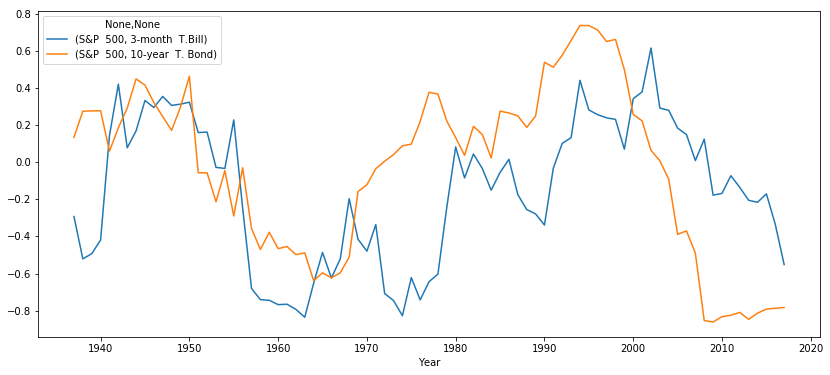

In [58]:
corr.plot(figsize=(14, 6));

In [52]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1937 to 2017
Data columns (total 9 columns):
(S&P  500, S&P  500)                    68 non-null float64
(S&P  500, 3-month  T.Bill)             81 non-null float64
(S&P  500, 10-year  T. Bond)            81 non-null float64
(3-month  T.Bill, S&P  500)             81 non-null float64
(3-month  T.Bill, 3-month  T.Bill)      80 non-null float64
(3-month  T.Bill, 10-year  T. Bond)     81 non-null float64
(10-year  T. Bond, S&P  500)            81 non-null float64
(10-year  T. Bond, 3-month  T.Bill)     81 non-null float64
(10-year  T. Bond, 10-year  T. Bond)    77 non-null float64
dtypes: float64(9)
memory usage: 6.3 KB


In [42]:
.replace(1.0, np.nan).dropna()

S&P  500                                  3-month  T.Bill  \
     S&P  500 3-month  T.Bill 10-year  T. Bond        S&P  500   
Year                                                             
1938      1.0       -0.521045         0.275344       -0.521045   
1941      1.0        0.143874         0.059845        0.143874   
1944      1.0        0.169732         0.449722        0.169732   
1945      1.0        0.333135         0.415914        0.333135   
1947      1.0        0.355074         0.246063        0.355074   
1948      1.0        0.306661         0.172203        0.306661   
1949      1.0        0.313523         0.298033        0.313523   
1950      1.0        0.323894         0.463868        0.323894   
1951      1.0        0.160233        -0.056487        0.160233   
1952      1.0        0.162770        -0.057164        0.162770   
1953      1.0       -0.027635        -0.213291       -0.027635   
1954      1.0       -0.033298        -0.044843       -0.033298   
1955      1.0        0.228533        -0.289883        0.228533   
1956      1.0       -0.245631        -0.029504       -0.245631   
1957      1.0       -0.680362        -0.356681       -0.680362   
1959      1.0       -0.744483        -0.377766       -0.744483   
1960      1.0       -0.768024        -0.465853       -0.768024   
1961      1.0       -0.765690        -0.454336       -0.765690   
1962      1.0       -0.793314        -0.498109       -0.793314   
1963      1.0       -0.835901        -0.488641       -0.835901   
1964      1.0       -0.652375        -0.638678       -0.652375   
1965      1.0       -0.486544        -0.596372       -0.486544   
1966      1.0       -0.624213        -0.623205       -0.624213   
1967      1.0       -0.520738        -0.596458       -0.520738   
1969      1.0       -0.415369        -0.158131       -0.415369   
1970      1.0       -0.479376        -0.120905       -0.479376   
1971      1.0       -0.336034        -0.035126       -0.336034   
1972      1.0       -0.708132         0.005915       -0.708132   
1973      1.0       -0.746092         0.041374       -0.746092   
1974      1.0       -0.827750         0.088741       -0.827750   
...       ...             ...              ...             ...   
1981      1.0       -0.084681         0.037358       -0.084681   
1982      1.0        0.044544         0.193858        0.044544   
1983      1.0       -0.033604         0.149917       -0.033604   
1984      1.0       -0.150403         0.022884       -0.150403   
1987      1.0       -0.174732         0.250099       -0.174732   
1988      1.0       -0.254697         0.188196       -0.254697   
1989      1.0       -0.278649         0.249198       -0.278649   
1990      1.0       -0.338577         0.539566       -0.338577   
1992      1.0        0.101621         0.577269        0.101621   
1993      1.0        0.132648         0.656944        0.132648   
1994      1.0        0.441827         0.737816        0.441827   
1996      1.0        0.256564         0.713008        0.256564   
1997      1.0        0.239433         0.651418        0.239433   
1998      1.0        0.231445         0.662654        0.231445   
1999      1.0        0.070822         0.499543        0.070822   
2000      1.0        0.342816         0.257994        0.342816   
2001      1.0        0.379592         0.223240        0.379592   
2002      1.0        0.616027         0.064120        0.616027   
2003      1.0        0.292183         0.008691        0.292183   
2004      1.0        0.280017        -0.092253        0.280017   
2005      1.0        0.184315        -0.388761        0.184315   
2006      1.0        0.149202        -0.369969        0.149202   
2009      1.0       -0.177424        -0.861438       -0.177424   
2010      1.0       -0.167929        -0.832793       -0.167929   
2012      1.0       -0.135416        -0.809898       -0.135416   
2013      1.0       -0.204950        -0.846933       -0.204950   
2014      1.0       -0.216010        -0.81401